In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=1,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1626961066
546/546 [==============================] - 246s 451ms/step - loss: 0.6364 - accuracy: 0.6255 - val_loss: 0.5555 - val_accuracy: 0.7218
INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


In [2]:
model.save('64x3-CNN.model')

INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


In [10]:
import tensorflow as tf
import cv2
CATEGORIES = ["Dog","Cat"]

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('cat.jpg')])

print(prediction)

[[1.]]


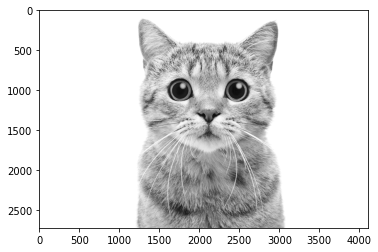

Cat


In [21]:
import matplotlib.pyplot as plt
img_array = cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")
plt.show()
prediction = model.predict([prepare('cat.jpg')])

print(CATEGORIES[int(prediction[0][0])])

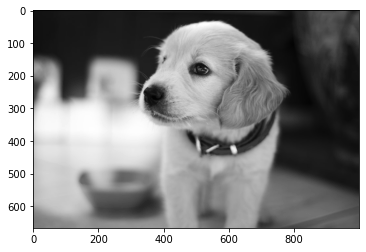

Dog


In [20]:
import matplotlib.pyplot as plt
img_array = cv2.imread('dog.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")
plt.show()

prediction = model.predict([prepare('dog.jpg')])

print(CATEGORIES[int(prediction[0][0])])

In [19]:
import pickle

X = X*255

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()


MemoryError: Unable to allocate 1.86 GiB for an array with shape (24946, 100, 100, 1) and data type float64